## Prodigy Infotech

### Name: Huma Urooj
### Batch : September

### Task 4

#### Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from the image or video data, enabling intuitive human- computer interaction and gesture based control system

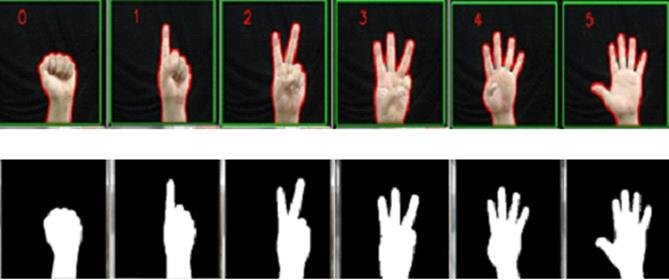

In [1]:
import numpy as np
import pandas as pd
import os
import cv2

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
dir = 'D:\PGD Module 3 -Machine Learning\Prodigy Infotech Internship tasks\leapGestRecog'

**Purpose:**

The code is designed to load images and their corresponding labels from a directory structure. It iterates through subdirectories, collects image paths, and stores them in the images list, while the corresponding labels are stored in the labels list.

**Explanation:**

**Initialization:**

images and labels lists are initialized to store image paths and labels, respectively.
Directory Iteration:

The for loops iterate through the specified directory structure:
for directory in os.listdir(dir): Iterates through the top-level directories.
for subDir in os.listdir(os.path.join(dir, directory)): Iterates through subdirectories within each top-level directory.
for img in os.listdir(os.path.join(dir, directory, subDir)): Iterates through image files within each subdirectory.
Image Path and Label Collection:

img_path = os.path.join(dir, directory, subDir, img): Constructs the full path to the image file.
images.append(img_path): Adds the image path to the images list.
labels.append(subDir): Adds the subdirectory name (which represents the label) to the labels list

In [3]:
images = []
labels = []
for directory in os.listdir(dir):
   for subDir in os.listdir(os.path.join(dir,directory)):
    for img in os.listdir(os.path.join(dir, directory, subDir)):
      img_path = os.path.join(dir, directory, subDir, img)
      images.append(img_path)
      labels.append(subDir)

#### Converting the data to DataFrame¶


In [4]:
Iseries = pd.Series(images, name="Images")
Lseries = pd.Series(labels, name="labels")
hand_gesture_data = pd.concat([Iseries, Lseries], axis=1)
hand_gesture_df = pd.DataFrame(hand_gesture_data)

In [5]:
print(hand_gesture_df.head())


                                              Images   labels
0  D:\PGD Module 3 -Machine Learning\Prodigy Info...  01_palm
1  D:\PGD Module 3 -Machine Learning\Prodigy Info...  01_palm
2  D:\PGD Module 3 -Machine Learning\Prodigy Info...  01_palm
3  D:\PGD Module 3 -Machine Learning\Prodigy Info...  01_palm
4  D:\PGD Module 3 -Machine Learning\Prodigy Info...  01_palm


#### counting the images in each class¶


In [6]:
pd.Series(labels).value_counts()


01_palm          2000
03_fist          2000
04_fist_moved    2000
05_thumb         2000
06_index         2000
07_ok            2000
08_palm_moved    2000
09_c             2000
10_down          2000
02_l             2000
05                 10
08                 10
07                 10
06                 10
00                 10
04                 10
03                 10
02                 10
01                 10
09                 10
Name: count, dtype: int64

#### Splitting the dataset into train and test¶


In [7]:
X_train, X_test = train_test_split(hand_gesture_df, test_size=0.2, random_state=42)
train_set, val_set = train_test_split(hand_gesture_df, test_size=0.3, random_state=42)

**MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices.** 

In [8]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="Images",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=4,
                                      shuffle=False
                                     )
test = image_gen.flow_from_dataframe(dataframe= X_test,x_col="Images", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=4,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="Images", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=4,
                                    shuffle=False
                                   )

Found 14004 validated image filenames belonging to 10 classes.
Found 3997 validated image filenames belonging to 10 classes.
Found 5996 validated image filenames belonging to 10 classes.


In [9]:
classes=list(train.class_indices.keys())
print (classes)

['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [10]:
def show_hand_gesture(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

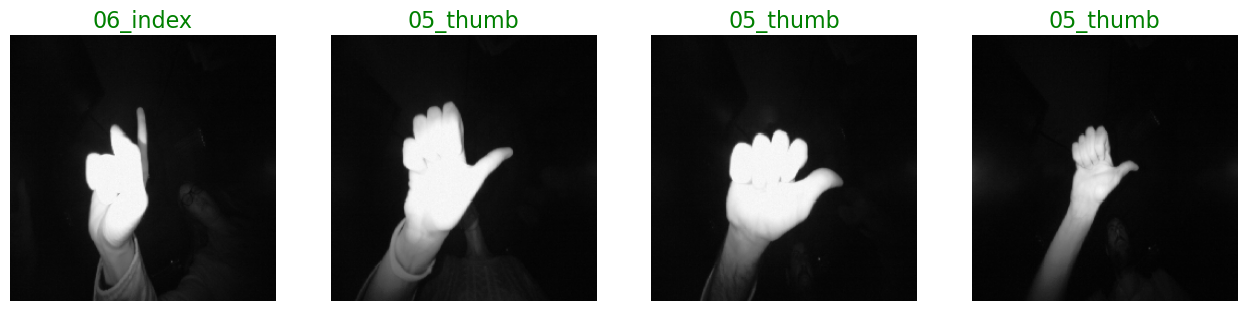

In [11]:
show_hand_gesture(train)


#### Building  the architecture 

**Architecture:**

**Input Layer:** The model takes images of size (224, 224, 3) as input, representing the height, width, and channels (RGB) of the images.

**Convolutional Layers:** The model uses multiple convolutional layers with varying filter sizes, strides, and activation functions. These layers extract features from the input images.

**Batch Normalization:** Batch normalization layers are used after each convolutional layer to normalize the activations, improving training stability and reducing overfitting.

**Pooling Layers:** Max pooling layers are used to downsample the feature maps, reducing computational cost and capturing the most important features.

**Fully Connected Layers:** The final layers are fully connected layers, which combine the extracted features and classify the input image into one of the 10 classes.

**Output Layer:** The final layer has 10 neurons with softmax activation, representing the probabilities of each class.


#### Hyperparameters:

**Filters:** The number of filters in each convolutional layer determines the capacity of the model to learn complex features.

**Kernel Size:** The size of the filters in each convolutional layer.

**Strides:** The stride of the convolutional layers determines the amount of overlap between the filters.

**Padding:** Padding can be used to maintain the spatial dimensions of the feature maps after convolution.

**Activation Function:** ReLU (Rectified Linear Unit) is used as the activation function in most layers, introducing non-linearity.

**Dropout:** Dropout layers are used to prevent overfitting by randomly dropping neurons during training.

**Learning Rate:** The learning rate of the optimizer (SGD in this case) controls the step size during training.


In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 73, 73, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 73, 73, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 512)         │           2,0

 Total params: 15,617,674 (59.58 MB)

 Trainable params: 15,611,274 (59.55 MB)

 Non-trainable params: 6,400 (25.00 KB)

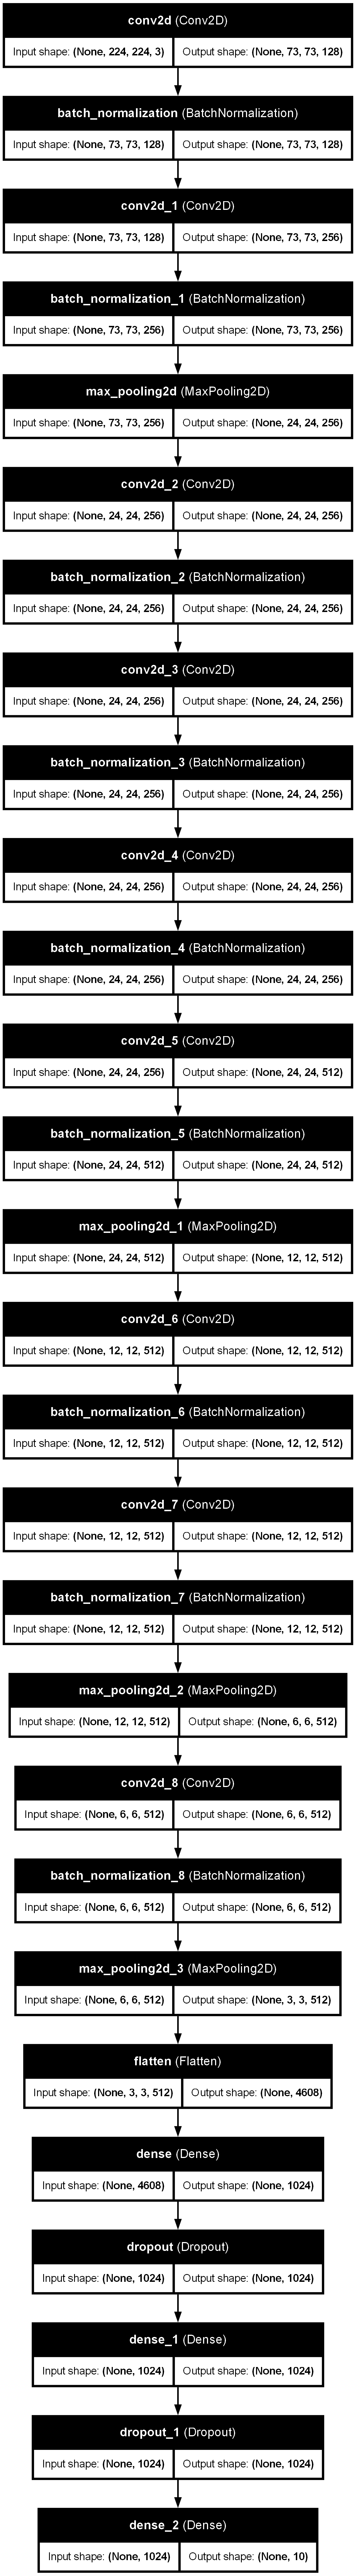

In [13]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [51]:
 project = model.fit(train, epochs=3, validation_data=val, verbose=1)


Epoch 1/3
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 3688s 1s/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 6.0932e-05
Epoch 2/3
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 3655s 1s/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 6.7554e-05
Epoch 3/3
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 3541s 1s/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 6.0168e-05


In [15]:
model.evaluate(test, verbose=1)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 303s 303ms/step - accuracy: 1.0000 - loss: 4.6656e-05


[0.00010184055281570181, 1.0]

In [16]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 297s 297ms/step


In [17]:
#!pip install h5py


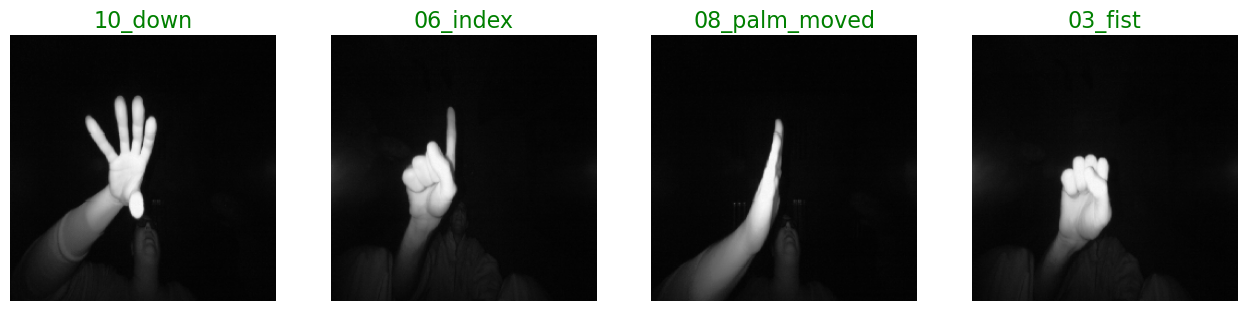

In [49]:
show_hand_gesture(test)


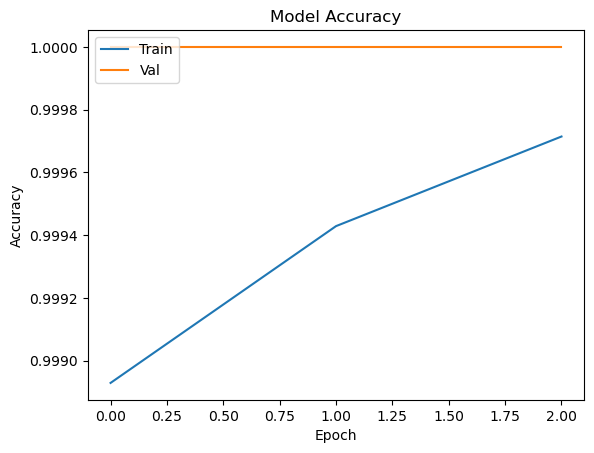

In [56]:
# Plot training and validation accuracy
plt.plot(project.history['accuracy'])
plt.plot(project.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [32]:
from skimage.io import imread
from keras.preprocessing import image
import skimage.io

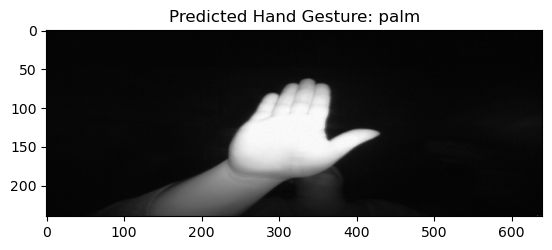

In [55]:
import cv2
import matplotlib.pyplot as plt

# Assuming you have the predicted_gesture and test_image_path variables defined
predicted_gesture = "palm"  # Replace with your actual predicted gesture
test_image_path = r"D:\PGD Module 3 -Machine Learning\Prodigy Infotech Internship tasks\leapGestRecog\05\01_palm\frame_05_01_0004.png"

# Load the image
img = cv2.imread(test_image_path)

# Show the image and print the predicted gesture
plt.imshow(img)
plt.title(f"Predicted Hand Gesture: {predicted_gesture}")
plt.show()

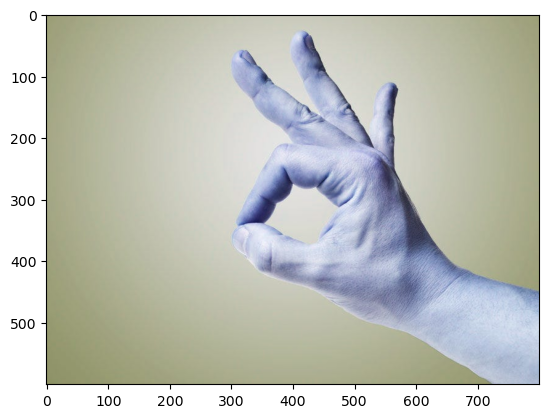

In [21]:
test_img = cv2.imread('D:\Images and Pictures\gesture.jpg')
plt.imshow(test_img)

In [59]:
# Predict on the test set
y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the test set
y_true = test.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Calculate classification report
report = classification_report(y_true, y_pred_classes)


print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 228s 228ms/step
Confusion Matrix:
[[418   0   0   0   0   0   0   0   0   0]
 [  0 393   0   0   0   0   0   0   0   0]
 [  0   0 433   0   0   0   0   0   0   0]
 [  0   0   0 427   0   0   0   0   0   0]
 [  0   0   0   0 366   0   0   0   0   0]
 [  0   0   0   0   0 400   0   0   0   0]
 [  0   0   0   0   0   0 388   0   0   0]
 [  0   0   0   0   0   0   0 416   0   0]
 [  0   0   0   0   0   0   0   0 388   0]
 [  0   0   0   0   0   0   0   0   0 368]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       1.00      1.00      1.00       393
           2       1.00      1.00      1.00       433
           3       1.00      1.00      1.00       427
           4       1.00      1.00      1.00       366
           5       1.00      1.00      1.00       400
           6       1.00      1.00      1.00       388
           7       1.00      1.00      1.00    

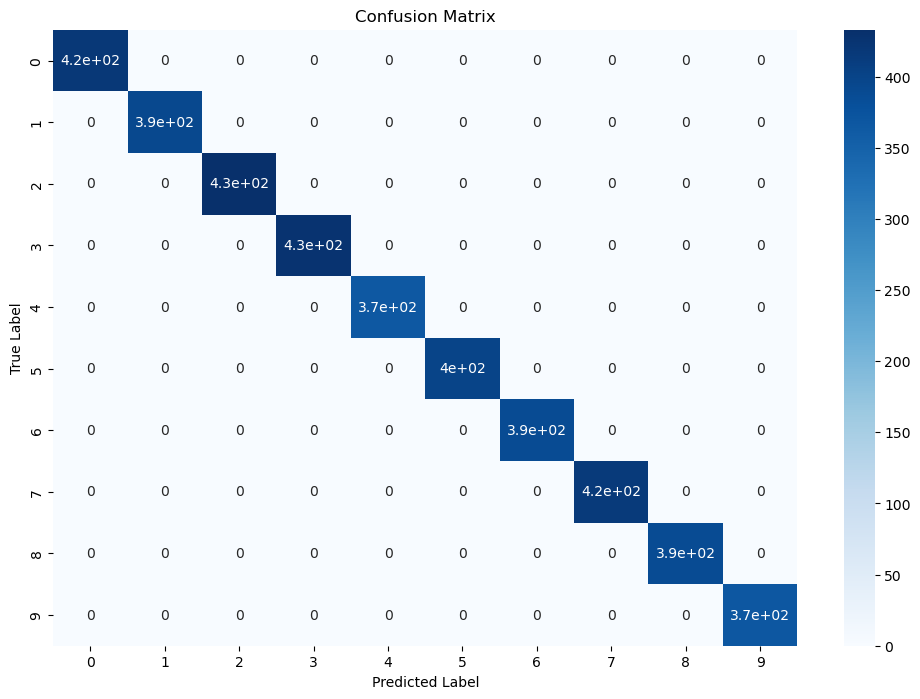

In [61]:
import seaborn as sns


# Draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap="Blues")  # Using "Blues" colormap for better visualization
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()